In [ ]:
import pandas as pd
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out= pd.read_csv(loc,**kwargs)
    return out

import urllib
def getLargeFile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        url = gdrive
        urllib.request.urlretrieve(gdrive, loc)
        out= pd.read_csv(loc,**kwargs)
    return out

fname = ("Crime_Data_from_2020_to_Present.csv", 
         "https://drive.google.com/u/0/uc?id=1WwLkX_BADtPY83rFQ4CQ5Lbf6UcI055A&export=download&confirm=t&uuid=4e0aae58-2f5b-4420-941f-8f2f49ae0cb8&at=ALAFpqzX_FrSz-hUtqhaXe2ui7h6:1667673013562")
data = getLargeFile(fname)
data.head()

local file not found; accessing Google Drive


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
data.shape

(590832, 28)

In [ ]:
data=data.drop(['DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
        'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT','LON'],axis=1)
data

,TIME OCC,Vict Age,Vict Sex,Vict Descent
0,2230,36,F,B
1,330,25,M,H
2,1200,0,X,X
3,1730,76,F,W
4,415,31,X,X
...,...,...,...,...
590827,1900,57,F,B
590828,10,34,F,H
590829,1530,0,NaN,NaN
590830,2000,0,NaN,NaN


In [ ]:
data.isnull().sum(axis=0)

TIME OCC            0
Vict Age            0
Vict Sex        78158
Vict Descent    78163
dtype: int64

In [ ]:
data.dropna(inplace=True,how='any') 


In [ ]:
data['Vict Sex']

0         F
1         M
2         X
3         F
4         X
         ..
590825    M
590826    M
590827    F
590828    F
590831    F
Name: Vict Sex, Length: 512666, dtype: object

In [ ]:
data['Vict Age']

0         36
1         25
2          0
3         76
4         31
          ..
590825    46
590826    33
590827    57
590828    34
590831    61
Name: Vict Age, Length: 512666, dtype: int64

In [ ]:
print (data.describe())

            TIME OCC       Vict Age
count  512666.000000  512666.000000
mean     1322.122409      34.543445
std       654.747894      19.591488
min         1.000000      -1.000000
25%       900.000000      24.000000
50%      1400.000000      34.000000
75%      1845.000000      48.000000
max      2359.000000      99.000000


In [ ]:
data.drop(data[data['Vict Age'] < 1].index, axis=0, inplace=True)

In [ ]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True)
print(t)

Vict Age    2    3    4    5    6    7    8    9   10   11  ...   91   92  93  \
Vict Sex                                                    ...                 
F         116  146  182  192  176  201  205  248  268  427  ...   90   68  44   
H           0    0    0    0    0    1    0    0    0    0  ...    0    0   0   
M         147  145  145  170  169  159  163  190  198  275  ...   52   30  26   
X          10   10    4    3    1    7    3    6   19    7  ...    2    2   0   
All       273  301  331  365  346  368  371  444  485  709  ...  144  100  70   

Vict Age  94  95  96  97  98   99     All  
Vict Sex                                   
F         49  36  31  23  21  100  215218  
H          0   0   0   0   0    0      64  
M         23  24  22  15  22  105  227350  
X          1   0   0   0   2    3    4912  
All       73  60  53  38  45  208  447544  

[5 rows x 99 columns]


In [ ]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True,normalize='index')
print(t)

Vict Age        2         3         4         5         6         7   \
Vict Sex                                                               
F         0.000539  0.000678  0.000846  0.000892  0.000818  0.000934   
H         0.000000  0.000000  0.000000  0.000000  0.000000  0.015625   
M         0.000647  0.000638  0.000638  0.000748  0.000743  0.000699   
X         0.002036  0.002036  0.000814  0.000611  0.000204  0.001425   
All       0.000610  0.000673  0.000740  0.000816  0.000773  0.000822   

Vict Age        8         9         10        11  ...        90        91  \
Vict Sex                                          ...                       
F         0.000953  0.001152  0.001245  0.001984  ...  0.000432  0.000418   
H         0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
M         0.000717  0.000836  0.000871  0.001210  ...  0.000334  0.000229   
X         0.000611  0.001221  0.003868  0.001425  ...  0.000000  0.000407   
All       0.000829  0.000992  0.0

In [ ]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True,normalize='columns')
print(t)

Vict Age         2         3         4         5         6         7  \
Vict Sex                                                               
F         0.424908  0.485050  0.549849  0.526027  0.508671  0.546196   
H         0.000000  0.000000  0.000000  0.000000  0.000000  0.002717   
M         0.538462  0.481728  0.438066  0.465753  0.488439  0.432065   
X         0.036630  0.033223  0.012085  0.008219  0.002890  0.019022   

Vict Age         8         9        10        11  ...        91    92  \
Vict Sex                                          ...                   
F         0.552561  0.558559  0.552577  0.602257  ...  0.625000  0.68   
H         0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00   
M         0.439353  0.427928  0.408247  0.387870  ...  0.361111  0.30   
X         0.008086  0.013514  0.039175  0.009873  ...  0.013889  0.02   

Vict Age        93        94   95        96        97        98        99  \
Vict Sex                                           

M    0.507995
F    0.480887
X    0.010975
H    0.000143
Name: Vict Sex, dtype: float64

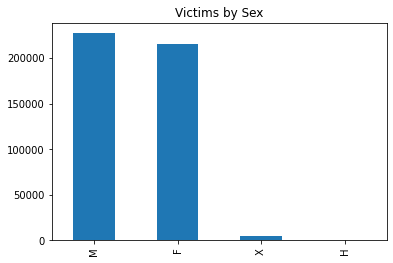

In [ ]:
data['Vict Sex'].value_counts().plot(kind='bar', title='Victims by Sex');
data['Vict Sex'].value_counts() / data.shape[0]

In [ ]:
#def gender_to_numeric(x):
#        if x=='M': return 3
#        if x=='F': return 2
#        if x=='X': return 1
#        if x=='H': return 0
#
#data['Vict Sex'] = data['Vict Sex'].apply(gender_to_numeric)
#data['Vict Sex'].unique()

In [ ]:
a = data['Vict Sex'].value_counts()
b = pd.DataFrame({'Sex_type':pd.Series(a.index),
                 'counts':pd.Series(a.values)})
b = b.sort_values(by='Sex_type',ascending=True)#这里排序后prestige_type为1~4，目的是为了和下面countplot()函数生成的柱状图顺序保持一致，然后就可以按相同顺序给柱状图添加数值标签
print(b)

  Sex_type  counts
1        F  215218
3        H      64
0        M  227350
2        X    4912


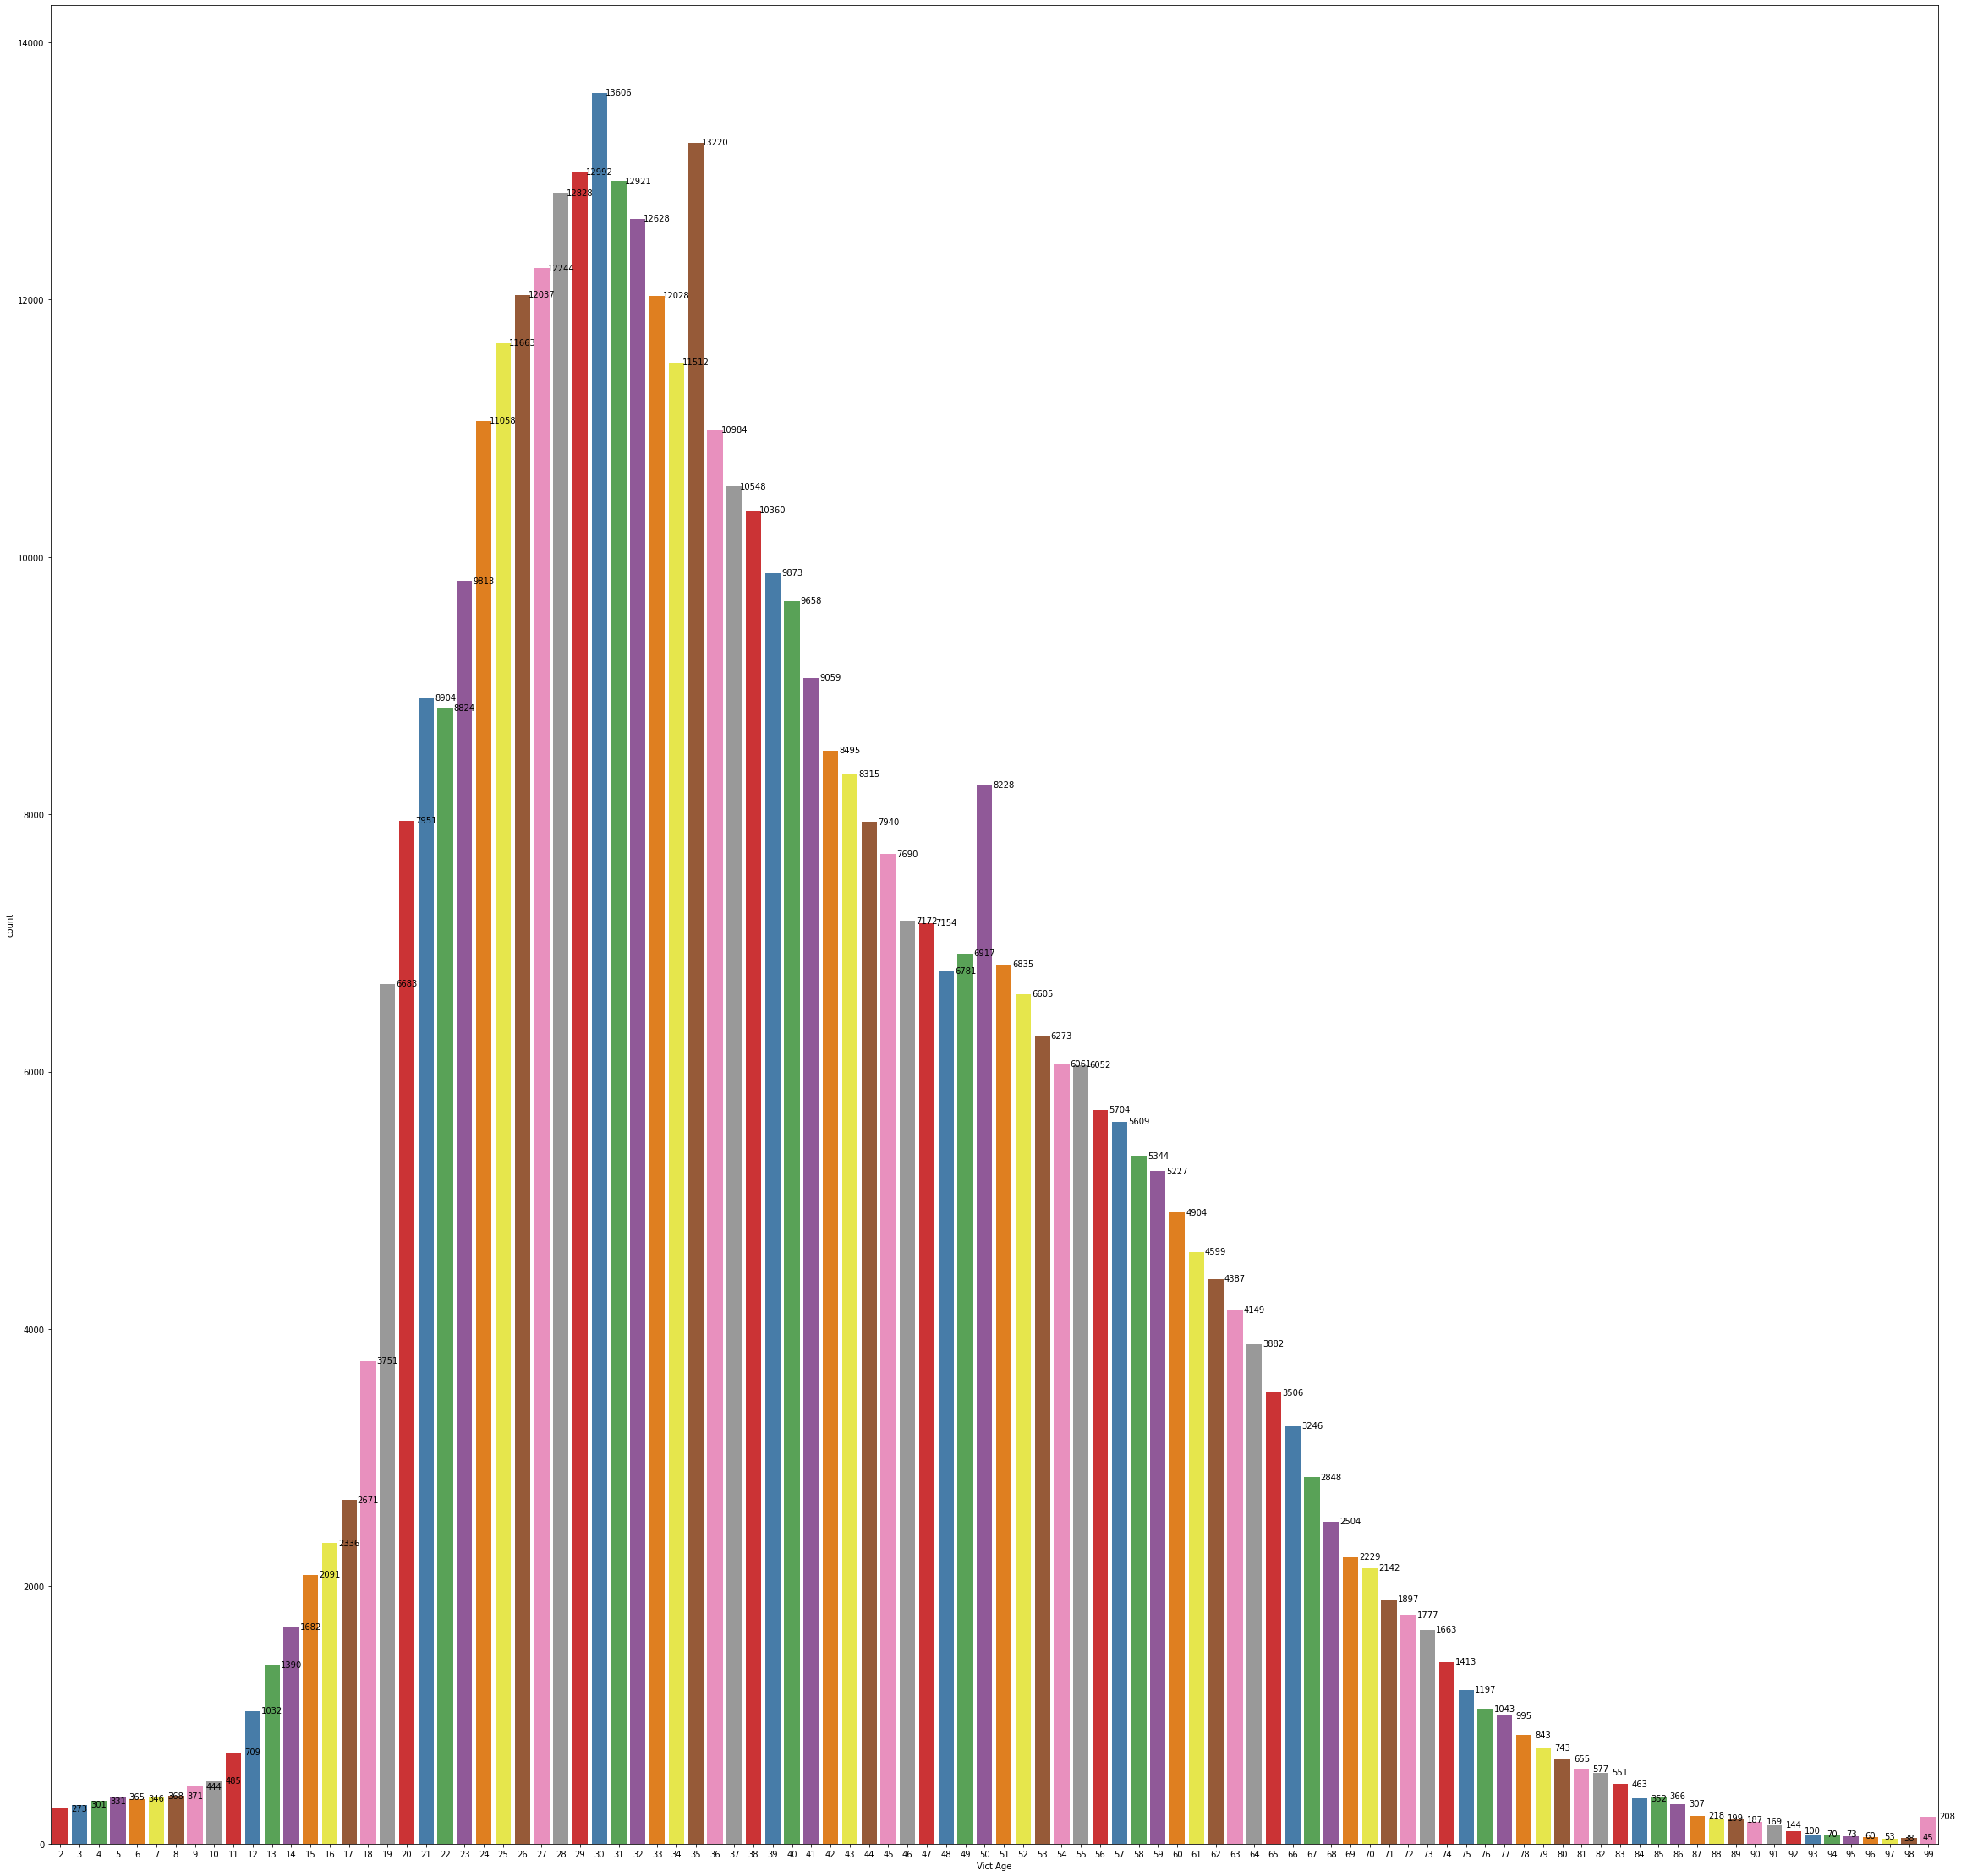

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [40, 40]

a = data['Vict Age'].value_counts()
b = pd.DataFrame({'Age_type':pd.Series(a.index),
                 'counts':pd.Series(a.values)})
b = b.sort_values(by='Age_type',ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x='Vict Age',data=data,palette='Set1')
for x,y in zip(b.Age_type,b.counts):
    plt.text(x-1,y+3,str(y),horizontalalignment='center',verticalalignment='center')

Text(0.5, 1.0, 'Boxplot of age')

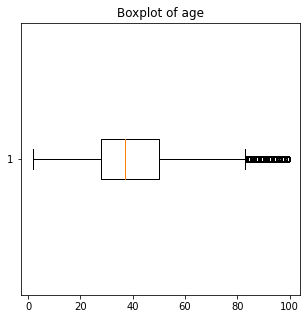

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.boxplot(x = data['Vict Age'],vert = False)
plt.title('Boxplot of age')

Text(0.5, 1.0, 'Boxplot of time')

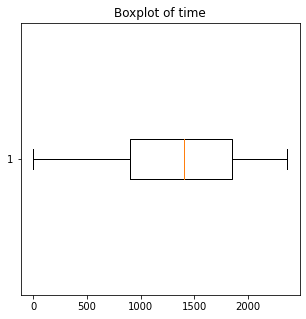

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x = data['TIME OCC'],vert = False)
plt.title('Boxplot of time')

In [ ]:
from sklearn.model_selection import train_test_split

#data['gender'] = data.gender.map({'M':0,'F':1})
#创建x和y
col = ['Vict Age','TIME OCC']
x = data[col]
y = data['Vict Sex']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
import sklearn.linear_model as sk

logreg = sk.LogisticRegressionCV(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegressionCV(class_weight='balanced', max_iter=1000,
                     multi_class='multinomial')

In [ ]:
#lr = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
#For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss
#lr.fit(x_train,y_train) ##拟合模型
score = logreg.score(x_train,y_train)
print(score)



0.26977250827433075


In [ ]:
print(logreg.coef_)


[[ 2.32885968e-02 -9.27665719e-05]
 [ 2.72528299e-02  1.18165171e-04]
 [ 3.33740113e-02 -1.23368305e-05]
 [-8.39154380e-02 -1.30617677e-05]]


In [ ]:
print(logreg.intercept_)


[-0.51511554 -0.96634626 -1.03513905  2.51660085]


In [ ]:
coef_c1 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[0].flatten()))
                        })
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
print(coef_c1)

        var  coef_abs
0  Vict Age  0.023289
1  TIME OCC  0.000093


In [ ]:
coef_c2 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[1].flatten()))
                        })
coef_c2 = coef_c2.sort_values(by = 'coef_abs',ascending=False)
print(coef_c2)

        var  coef_abs
0  Vict Age  0.027253
1  TIME OCC  0.000118


In [ ]:
coef_c3 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[2].flatten()))
                        })
coef_c3 = coef_c3.sort_values(by = 'coef_abs',ascending=False)
print(coef_c3)

        var  coef_abs
0  Vict Age  0.033374
1  TIME OCC  0.000012


In [ ]:
from sklearn.metrics import accuracy_score

score = logreg.score(x_train,y_train)#Return the mean accuracy on the given test data and labels.
print(score)#0.628125

#模型在训练集上的得分
train_score = accuracy_score(y_train,logreg.predict(x_train))
print(train_score)#0.628125

#模型在测试集上的得分
test_score = logreg.score(x_test,y_test)
print(test_score)#0.6

0.26977250827433075
0.26977250827433075
0.27074372409478376


In [ ]:
from sklearn.metrics import recall_score

#训练集的召回率
train_recall = recall_score(y_train, logreg.predict(x_train), average='macro')
print(train_recall)#0.47934382086167804
#测试集的召回率
test_recall = recall_score(y_test, logreg.predict(x_test), average='macro')
print(test_recall)#0.5002736726874658


0.39892199677205176
0.4094922580091085


In [ ]:
y_pro = logreg.predict_proba(x_test) ##获取预测概率值
print(y_pro)

[[0.2822004  0.35253945 0.33877909 0.02648106]
 [0.29349271 0.30006181 0.28949341 0.11695207]
 [0.3336112  0.28974435 0.3546889  0.02195555]
 ...
 [0.28321779 0.20158173 0.22333317 0.29186731]
 [0.24964902 0.28593552 0.24216657 0.22224889]
 [0.30670146 0.32070572 0.33530856 0.03728427]]


In [ ]:
y_predict = logreg.predict(x_test)
print(y_predict)

['H' 'H' 'M' ... 'X' 'H' 'M']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pandas as pd
labelEncoder = LabelEncoder()
labelEncoder.fit(y)##对变量y进行硬编码，将标签变为数字
cm = confusion_matrix(y_test, y_predict)
cm_pd = pd.DataFrame(data = cm,columns=labelEncoder.classes_, index=labelEncoder.classes_)
print(cm_pd)

      F      H      M      X
F  9090   9067  11595  13312
H     3      3      2      4
M  9433  10510  14302  11215
X    55     40     39    839


Text(0.5, 0, 'Forecast type')

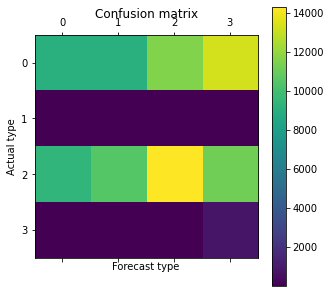

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(y_test, y_predict))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual type') #实际类型
plt.xlabel('Forecast type') #预测类型

In [ ]:
from sklearn.metrics import classification_report
print('测试数据指标:\n',classification_report(y_test,y_predict,digits=4))

测试数据指标:
               precision    recall  f1-score   support

           F     0.4892    0.2111    0.2949     43064
           H     0.0002    0.2500    0.0003        12
           M     0.5514    0.3146    0.4006     45460
           X     0.0331    0.8623    0.0637       973

    accuracy                         0.2707     89509
   macro avg     0.2685    0.4095    0.1899     89509
weighted avg     0.5158    0.2707    0.3461     89509

